In [1]:
# import modules, create output directory

import matplotlib.pyplot as pyplot
import numpy as np
import os
import underworld as uw
uw.utils.matplotlib_inline()
from underworld import function as fn
import underworld.visualisation as vis
import pickle

outputPath = os.path.join(os.path.abspath("."),"output/")

if not os.getcwd().rsplit("/")[-1] == "output":
    os.chdir(outputPath)
else:
    outputPath = os.path.abspath(".")

In [2]:
print ( outputPath )
print ( 'model_data.p' in os.listdir (outputPath) ) 
print ( 'mesh.h5' in os.listdir (outputPath) )

/home/jovyan/workspace/output/
True
True


# Load experiment data

In [3]:
# load and apply basic model data from file
MODEL_DATA_FILE = outputPath + "model_data.p"
# print(MODEL_DATA_FILE)
MODEL_DATA = pickle.load( open( MODEL_DATA_FILE, "rb" ) )

### Generate mesh and required functions

In [4]:
## basic parameters
mesh = uw.mesh.FeMesh_Cartesian()

mesh = uw.mesh.FeMesh_Cartesian( elementType = ( MODEL_DATA['ELEMENT_TYPE'] ) ,
                                 elementRes  = ( MODEL_DATA['RES_X'], MODEL_DATA['RES_Y'] ),
                                 minCoord    = ( MODEL_DATA['MIN_X'], MODEL_DATA['MIN_Y'] ),
                                 maxCoord    = ( MODEL_DATA['MAX_X'], MODEL_DATA['MAX_Y'] ),
                                 periodic    = ( MODEL_DATA['PERIODIC_X'], MODEL_DATA['PERIODIC_Y'] )
                               )

velocityField    = mesh.add_variable(         dataType="double",  nodeDofCount=2 )
pressureField    = mesh.subMesh.add_variable( dataType="double",  nodeDofCount=1 )

velocityField.data[:] = [0.,0.]
pressureField.data[:] = 0.

viz_opts = {
            "figsize"     : (2000,400),
            "edgecolour"   :  "black",
            "quality"      :  3,          # antialiasing
            "align"        : "bottom",     # colour bar alignment
            "size"        : (0.83,0.01), # colour bar size
            "position"    : 0.,          # colour bar position
            "boundingBox"  : ((MODEL_DATA['MIN_X'], MODEL_DATA['MIN_Y']), (MODEL_DATA['MAX_X'], MODEL_DATA['MAX_Y']) ),
            "axis"         : True,
            "scale"        : True,
           }

# required functions

coord = fn.input()

	Global element size: 4x4
	Local offset of rank 0: 0x0
	Local range of rank 0: 4x4
	Global element size: 80x10
	Local offset of rank 0: 0x0
	Local range of rank 0: 80x10


# Load data

In [6]:
#print ("in step " + str(step))

# Create a swarm which will define our material geometries, and will also
# track deformation and history dependence of particles.
try:
    del(swarm)
except NameError:
    print ("there is no swarm yet")

swarm  = uw.swarm.Swarm( mesh=mesh )

try:
    del (surfaceSwarm)
except NameError:
    print("there is not surface Swarm yet")
    
surfaceSwarm = uw.swarm.Swarm(mesh=mesh)

# Initialise required particle properties 

materialVariable = swarm.add_variable( dataType="int", count=1 )
cAngle = swarm.add_variable( dataType="double", count=1 )
particleDensity = swarm.add_variable ( dataType="double", count=1 )
particleStrainrate = swarm.add_variable ( dataType="double", count=1 )
particleViscosity = swarm.add_variable ( dataType="double", count=1 )
particleShearstress = swarm.add_variable ( dataType="double", count=1 )
particleDirector = swarm.add_variable ( dataType="double", count=2 )
particleMeshDirector = swarm.add_variable ( dataType="double", count=2 ) 
particlePrefactor = swarm.add_variable ( dataType="double", count=1 )
particleWeakzone = swarm.add_variable ( dataType="int", count=1 )
particleTemperature = swarm.add_variable ( dataType="double", count=1 ) ###
particleVelocity = swarm.add_variable( dataType="double", count=2 )
iceSurf = swarm.add_variable ( dataType="int", count=1 )
particleCreationTime = swarm.add_variable ( dataType="float", count=1 )
showPlane = swarm.add_variable ( dataType="int", count=1 )
foldHeight = swarm.add_variable( dataType="double", count=1 )

step = 5

#print(os.listdir (outputPath))
#print ( 'swarm_' + str(step).zfill(5) + '.h5' in os.listdir (outputPath) ) 

swarm.load(outputPath + '/swarm_' + str(step).zfill(5) + '.h5')
#surfaceSwarm.load(outputPath + '/surfaceSwarm_' + str(step).zfill(5) + '.h5')

particleStrainrate.load(outputPath + '/particleStrainrate_' + str(step).zfill(5) + '.h5')
particleDirector.load(outputPath + '/director_' + str(step).zfill(5) + '.h5')
particleViscosity.load(outputPath + '/particleViscosity_' + str(step).zfill(5) + '.h5')
cAngle.load(outputPath + '/cAngle_' + str(step).zfill(5) + '.h5')
#materialVariable.load(outputPath + '/particleMaterial_' + str(step).zfill(5) + '.h5')
particleVelocity.load(outputPath + '/particleVelocity_' + str(step).zfill(5) + '.h5')

# Plot figures


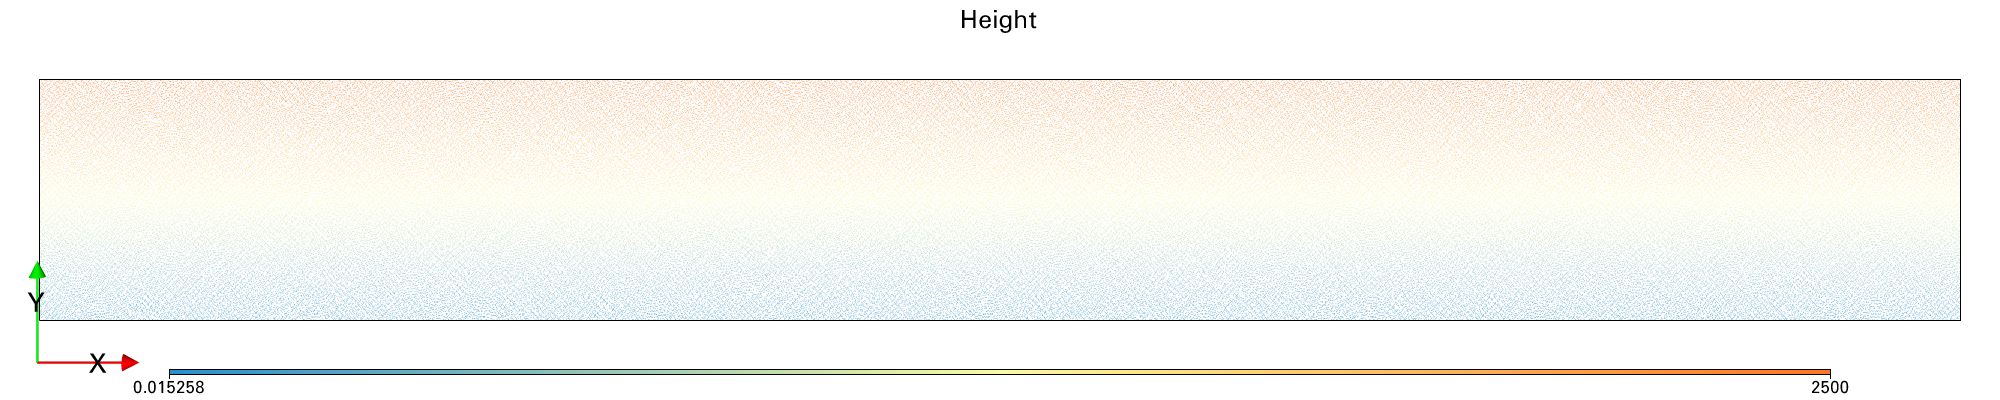


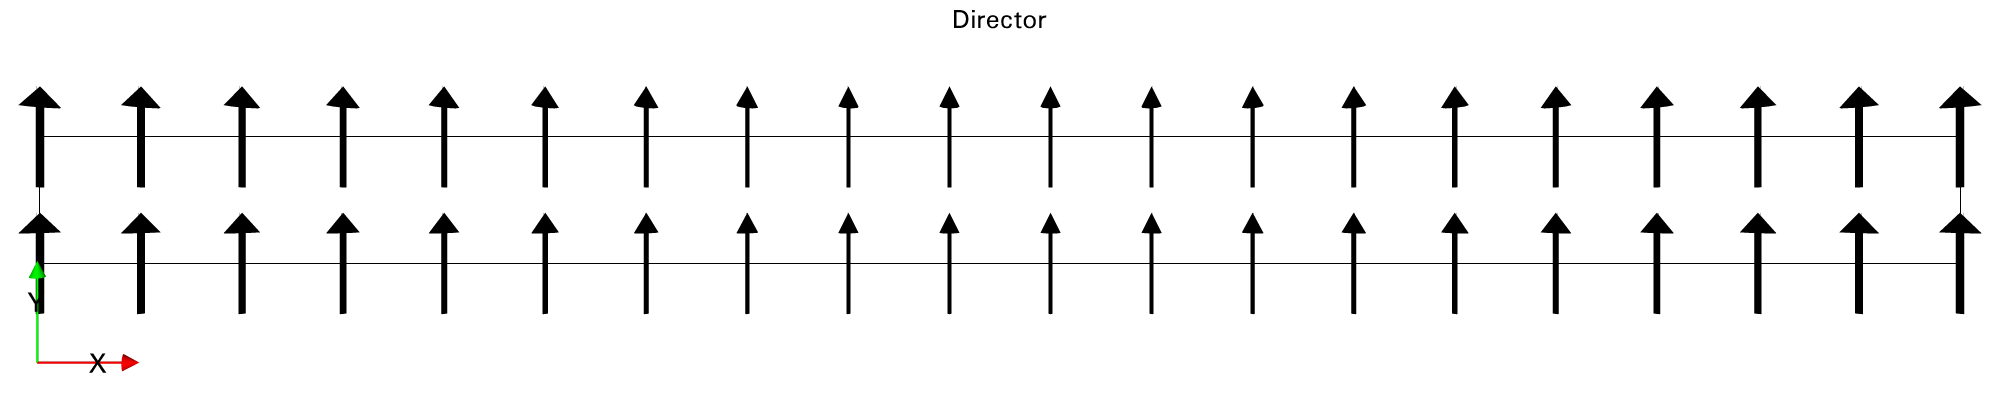


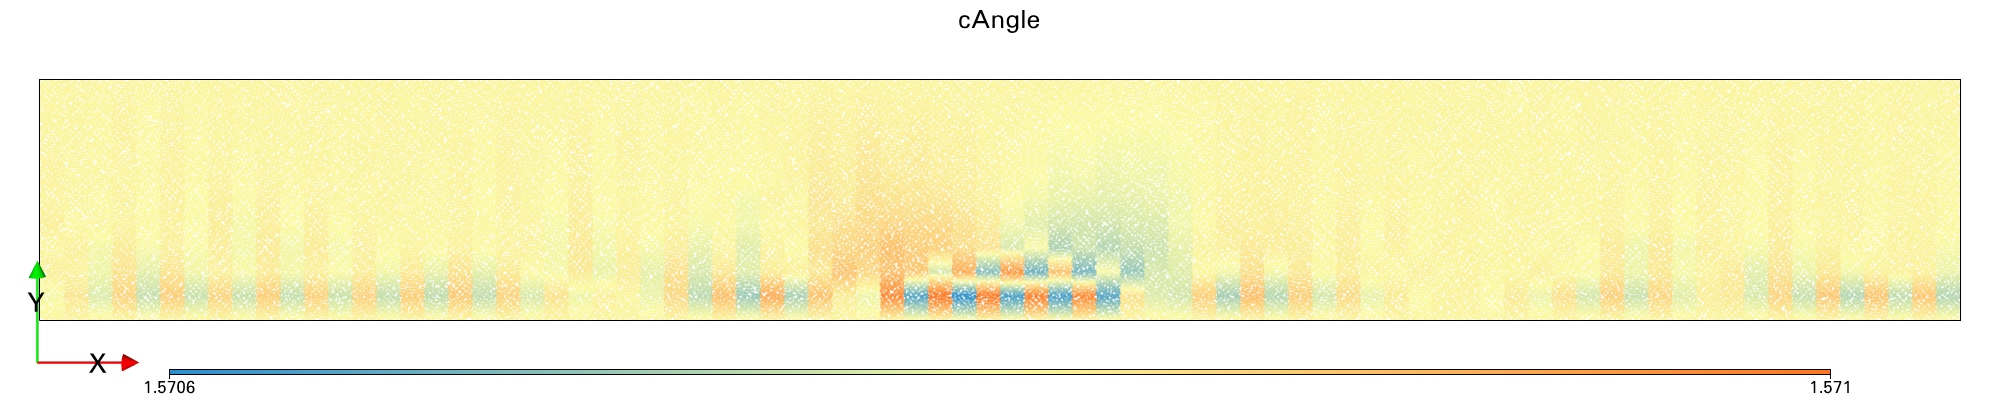


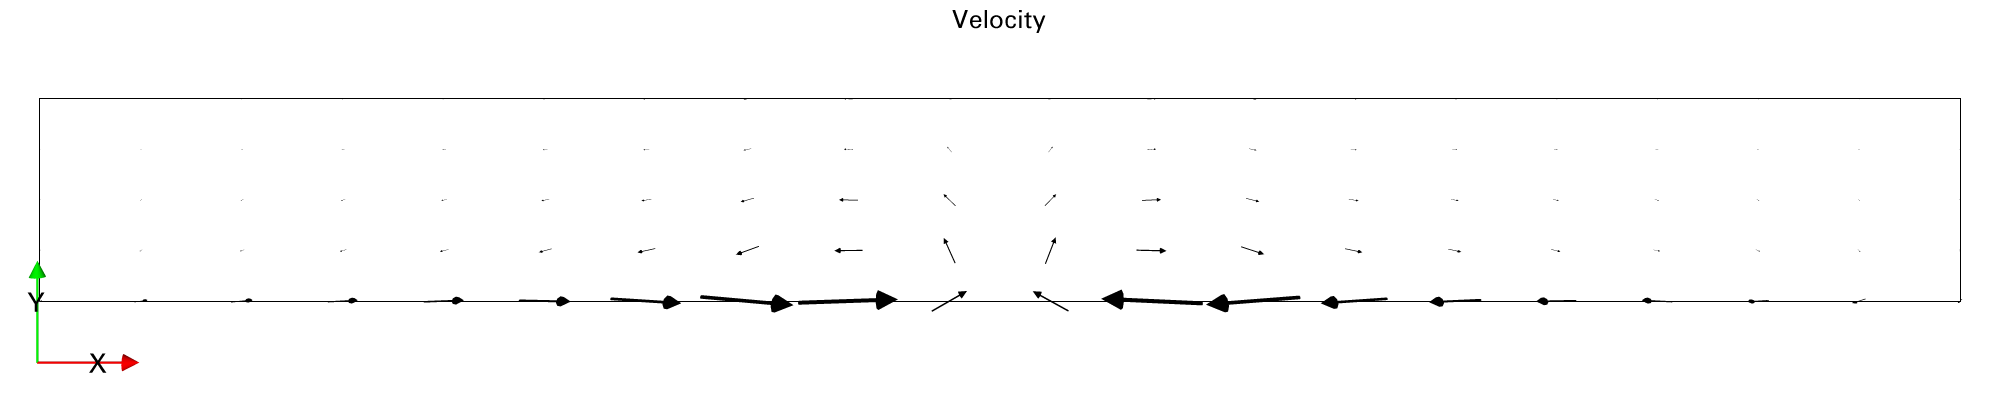

In [8]:
figSurf = vis.Figure(**viz_opts, title="Height")
figSurf.append(vis.objects.Points(swarm, coord[1], pointSize=1.0, colourBar=True))
#figSurf.append(vis.objects.Points(surfaceSwarm, pointSize=1.0, colourBar=True))
figSurf.show()

#figVisc = vis.Figure(**viz_opts, title="Viscosity")
#figVisc.append(vis.objects.Points(swarm, particleViscosity, pointSize=3.0, colourBar=True))
#figVisc.append(visc)
#figVisc.show()

figDirector = vis.Figure(**viz_opts, title="Director")
figDirector.append(vis.objects.VectorArrows(mesh, particleDirector, resolution=[20, 2, 1], autoscale=True,))
figDirector.show()

figCAngle = vis.Figure(**viz_opts, title="cAngle")
figCAngle.append(vis.objects.Points(swarm, cAngle, pointSize=3.0, colourBar=True,))
figCAngle.show()

figVel = vis.Figure(**viz_opts, title="Velocity")
figVel.append(vis.objects.VectorArrows(mesh, particleVelocity, resolution=[20, 5, 1], autoscale=True,))
figVel.show()